In [1]:
using DataFrames, FileIO, DelimitedFiles
using Plots, Optim, LsqFit, JUMD
using Statistics, NamedArrays

In [11]:
# Get ready
dir_apo_ndd = "/home/pbarletta/labo/20/cph_obp/run/apo/ndd"
dir_ctv_ndd = "/home/pbarletta/labo/20/cph_obp/run/ctv/ndd"
dir_eol_ndd = "/home/pbarletta/labo/20/cph_obp/run/eol/ndd"

nstlim = 12000
phs = collect(2.0:.5:7.5)
idx = collect(1:12)

titrable_resis = [4, 5, 11, 13, 20, 24, 30, 33, 37, 39, 40,
    48, 58, 73, 77, 78, 87, 93, 94, 97, 117]
titrable_resnames = ["GL4", "GL4", "HIP", "GL4", "GL4", "AS4",
    "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4",
    "GL4", "AS4", "GL4", "GL4", "HIP", "AS4"]
titrable_cnt = length(titrable_resis)

21

In [12]:
flx_apo_5 = Array{Float64, 1}(undef, 0)
flx_ctv_5 = Array{Float64, 1}(undef, 0)
flx_eol_5 = Array{Float64, 1}(undef, 0)

for ph in phs
    push!(flx_apo_5, convert(Float64,
            readdlm(joinpath(dir_apo_ndd, string(ph), string("flx_apo_", ph, "_5")))[2]))
    push!(flx_ctv_5, convert(Float64,
            readdlm(joinpath(dir_ctv_ndd, string(ph), string("flx_ctv_", ph, "_5")))[2]))
    push!(flx_eol_5, convert(Float64,
            readdlm(joinpath(dir_eol_ndd, string(ph), string("flx_eol_", ph, "_5")))[2]))
end

## flexibilidad por pH

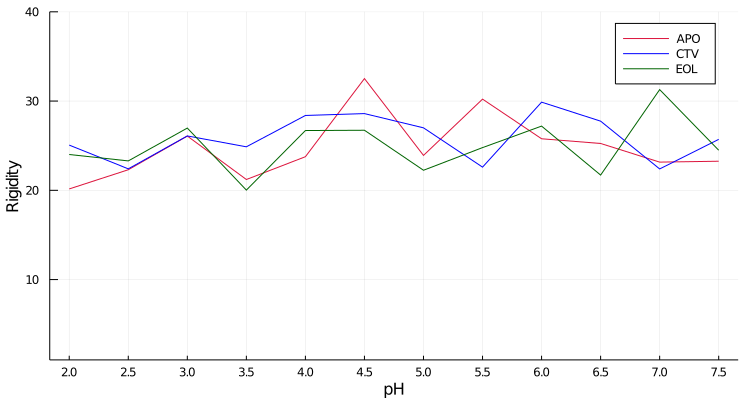

In [19]:
plot(phs, flx_apo_5,
    size = (750, 400),
    ylims = (1, 40), xticks = phs,
    label = "APO",
    linecolor = Colors.colorant"Crimson",
    yaxis = "Rigidity", xaxis = "pH")

plot!(phs, flx_ctv_5,
    ylims = (1, 40),
    label = "CTV",
    linecolor = Colors.colorant"Blue")

plot!(phs, flx_eol_5,
    ylims = (1, 40),
    label = "EOL",
    linecolor = Colors.colorant"DarkGreen")